In [11]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact

def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)

def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y

def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit

def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()

x, y = noisy_gaussian()

@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [3]:
import numpy as np
np.exp?

Call signature:  np.exp(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'exp'>
File:            ~/opt/anaconda3/lib/python3.7/site-packages/numpy/__init__.py
Docstring:      
exp(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Calculate the exponential of all elements in the input array.

Parameters
----------
x : array_like
    Input values.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array will retain its original value.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [50]:
def step():
    return 1. if random.random() > .5 else -1.

In [51]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x

In [52]:
n = 100000
x = walk(n)

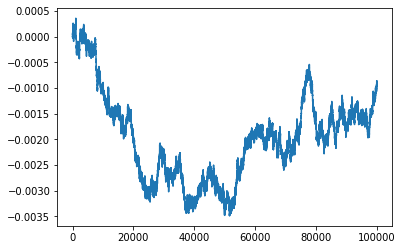

In [53]:
plt.plot(x)

In [54]:
t1 = %timeit -o walk(n)
t1.best

51.2 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


0.05021951370001716

In [55]:
%%prun
walk(n)

         200003 function calls in 0.087 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.061    0.061    0.087    0.087 <ipython-input-51-94fe46e3b455>:1(walk)
    99999    0.020    0.000    0.026    0.000 <ipython-input-50-52961148e468>:1(step)
    99999    0.006    0.000    0.006    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.087    0.087 {built-in method builtins.exec}
        1    0.000    0.000    0.087    0.087 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [38]:
!pip install line_profiler

     |████████████████████████████████| 45 kB 396 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for line-profiler: filename=line_profiler-3.0.2-cp37-cp37m-macosx_10_15_x86_64.whl size=55561 sha256=3717bbd5090ef25bdb31c8fee567c877024431bb467f97d1f4427c65743b682d
  Stored in directory: /Users/maksymej/Library/Caches/pip/wheels/20/28/5c/69ef18a2dc224b4230d6b88e9c0721ec7d3bb425b71d3248ce
Successfully built line-profiler


In [39]:
%load_ext line_profiler

In [41]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:
  %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These stat

In [56]:
%lprun -f walk walk(n)

Timer unit: 1e-06 s

Total time: 0.228566 s
File: <ipython-input-51-94fe46e3b455>
Function: walk at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def walk(n):
     2         1         83.0     83.0      0.0      x = np.zeros(n)
     3         1          2.0      2.0      0.0      dx = 1. / n
     4    100000      36227.0      0.4     15.8      for i in range(n - 1):
     5     99999     103202.0      1.0     45.2          x_new = x[i] + dx * step()
     6     99999      43245.0      0.4     18.9          if x_new > 5e-3:
     7                                                       x[i + 1] = 0.
     8                                                   else:
     9     99999      45806.0      0.5     20.0              x[i + 1] = x_new
    10         1          1.0      1.0      0.0      return x

In [57]:
%lprun -f step walk(n)

Timer unit: 1e-06 s

Total time: 0.04175 s
File: <ipython-input-50-52961148e468>
Function: step at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def step():
     2     99999      41750.0      0.4    100.0      return 1. if random.random() > .5 else -1.

In [62]:
ipywidgets?

Type:        module
String form: <module 'ipywidgets' from '/Users/maksymej/opt/anaconda3/lib/python3.7/site-packages/ipywidgets/__init__.py'>
File:        ~/opt/anaconda3/lib/python3.7/site-packages/ipywidgets/__init__.py
Docstring:  
Interactive widgets for the Jupyter notebook.

Provide simple interactive controls in the notebook.
Each Widget corresponds to an object in Python and Javascript,
with controls on the page.

To put a Widget on the page, you can display it with IPython's display machinery::

    from ipywidgets import IntSlider
    from IPython.display import display
    slider = IntSlider(min=1, max=10)
    display(slider)

Moving the slider will change the value. Most Widgets have a current value,
accessible as a `value` attribute.


In [61]:
import ipywidgets